In [54]:
'''
You just got some contract work with an Ecommerce company based in New York City that sells clothing online but also have in-store style and clothing advice sessions.
Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!
'''

"\nYou just got some contract work with an Ecommerce company based in New York City that sells clothing online but also have in-store style and clothing advice sessions.\nCustomers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.\nThe company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!\n"

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
#data for ecommerce customers
df=pd.read_csv('data.csv')

In [57]:
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [58]:
df.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


# exploratory data analysis

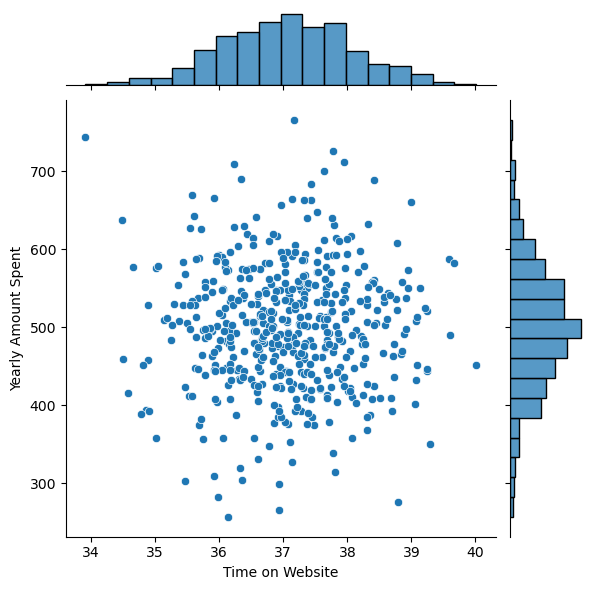

In [59]:
#using seaborn to create jointplots to compare Time on website and yearly amt spent columns
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

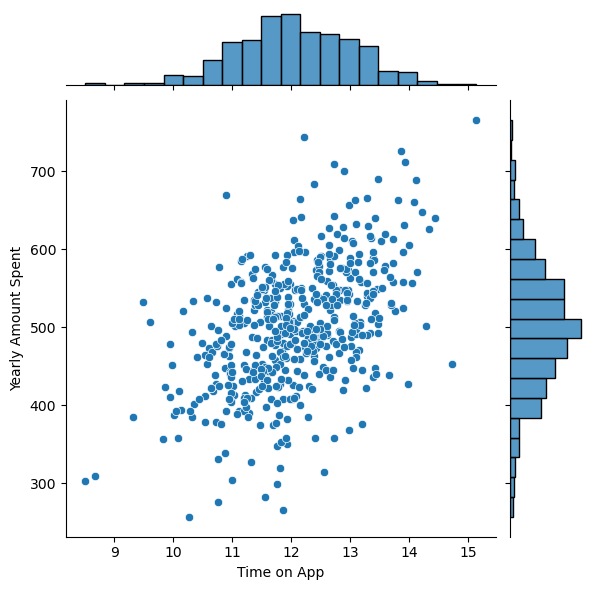

In [60]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent')

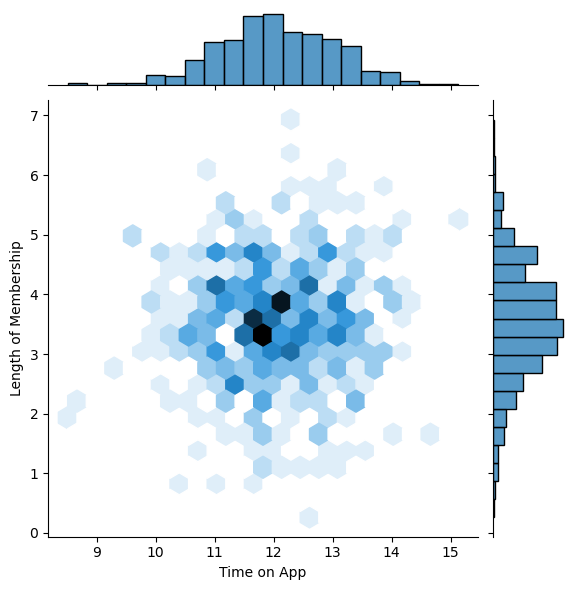

In [61]:
#use jointplot to create 2d hex bin plot comparing Time on app and length of membership
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df)

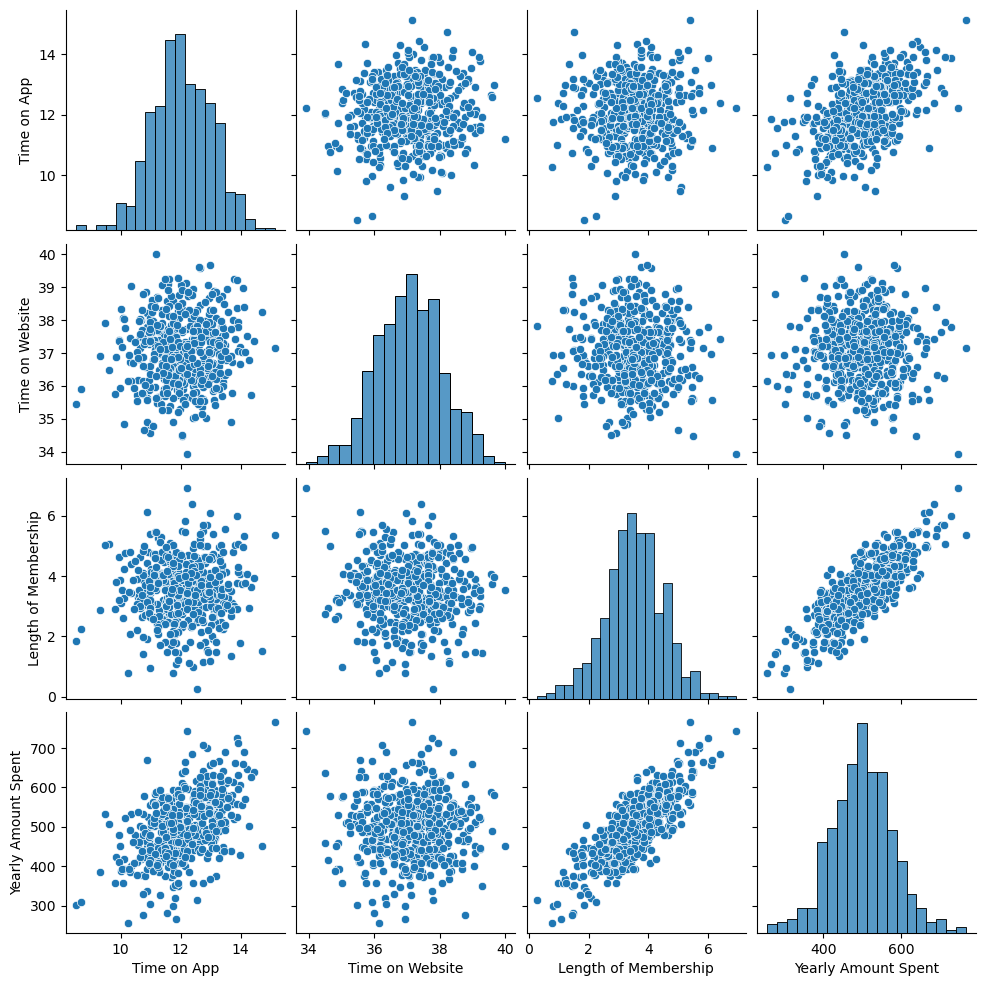

In [62]:
#creating pairplot for entire dataset
sns.pairplot(df)

In [63]:
#based off the above plots to be most correlated features with yearly amount spent
'''
Length of Membership
'''

'\nLength of Membership\n'

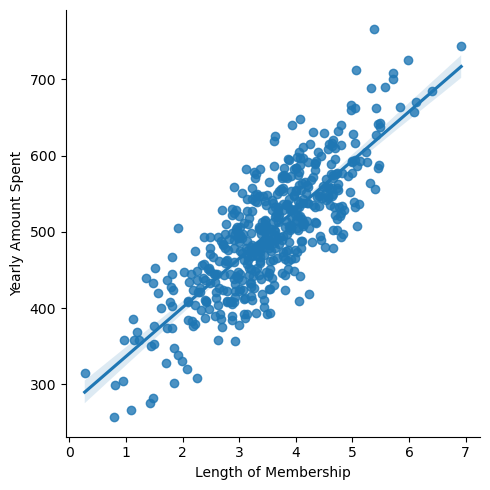

In [64]:
#linear model plot
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

# Training and Testing Data

In [65]:
df.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [66]:
y=df['Yearly Amount Spent']

In [67]:
X=df[['Time on App', 'Time on Website','Length of Membership']]

In [68]:
#for spliting data into traininng and testing we use
from sklearn.model_selection import train_test_split

In [69]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# training the model

In [71]:
from sklearn.linear_model import LinearRegression 

In [72]:
#creating instance of linear REgression
lm=LinearRegression()

In [73]:
#train/fit on training data
lm.fit(X_train,y_train)

LinearRegression()

In [74]:
#coeffients
lm.coef_

array([36.73506185,  1.06976162, 62.09959533])

# Predicting test data

In [75]:
predictions=lm.predict(X_test)

Text(0.5, 0, 'Predicted values')

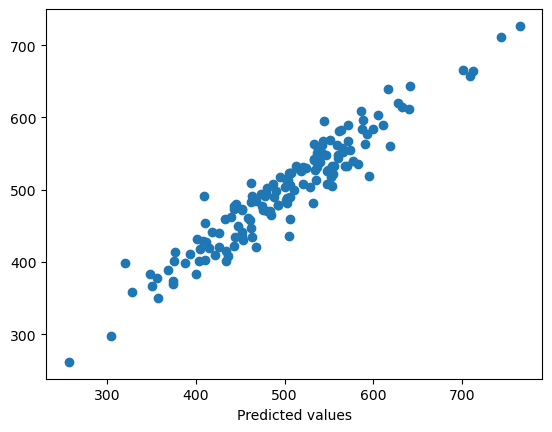

In [76]:
#creating scatterplot of real test values vs the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True Values)')
plt.xlabel('Predicted values')

# Evaluating the model

In [77]:
from sklearn import metrics

In [78]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE 20.68662778076648
MSE 678.3961717781162
RMSE 26.046039464343064


In [79]:
metrics.explained_variance_score(y_test,predictions)

0.9068561842704586

# Residuals

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

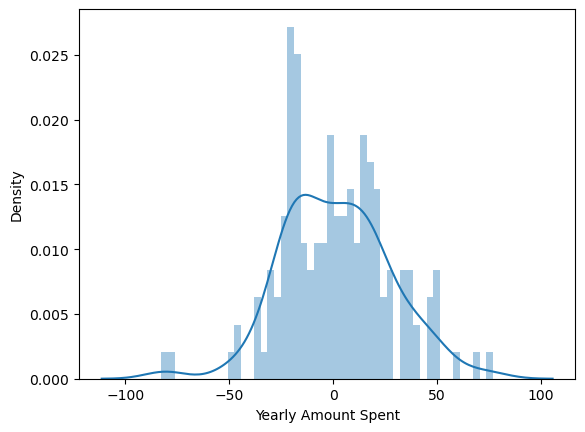

In [80]:
#to see if everything is okay
sns.distplot((y_test-predictions),bins=50)

# Conclusion

In [81]:
#do we focus our effort on mobile app or website dev.
#recreating dataframe below

In [82]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Time on App,36.735062
Time on Website,1.069762
Length of Membership,62.099595


In [83]:
#do you think company focus more on thier mobile app or on their website
'''
Given this information now this is actually tricky because there's two ways to think about this.

If you look at your coefficients and the data in our model we could develop the Web site to catch upto the mobile app.

So one way of thinking about this is oh well the Web site needs the most work and that's where we should focus more of our efforts.

Or you can think of it another way which is you should develop the app more since it is working already much better.

And this sort of answer really depends on a number of factors going on at this particular company or

wherever the state is actually coming from and you're going to want to explore the length of the relationship

between length of membership and the app or the Web site for coming to a conclusion.
'''


"\nGiven this information now this is actually tricky because there's two ways to think about this.\n\nIf you look at your coefficients and the data in our model we could develop the Web site to catch upto the mobile app.\n\nSo one way of thinking about this is oh well the Web site needs the most work and that's where we should focus more of our efforts.\n\nOr you can think of it another way which is you should develop the app more since it is working already much better.\n\nAnd this sort of answer really depends on a number of factors going on at this particular company or\n\nwherever the state is actually coming from and you're going to want to explore the length of the relationship\n\nbetween length of membership and the app or the Web site for coming to a conclusion.\n"